# Portfolio Project: Cleaning and Analyzing US Census Data
## Introduction
I was tasked with cleaning and analyzing the most recent census data, which was scattered across multiple CSV files. The goal was to transform this messy data into a clean, usable format and create insightful visualizations. In this portfolio project, I will showcase the step-by-step process I followed to clean the data and create meaningful visualizations using Python and pandas.

## Step 1: Inspect the Data
I began by inspecting the data to understand its structure and content. The first visualization my boss requested was a scatterplot showing the average income in a state vs. the proportion of women in that state. To achieve this, I needed to load and merge the CSV files into a single DataFrame called `us_census`. I used the `glob` library to find and load all the CSV files.

In [3]:
import pandas as pd
import glob

files = glob.glob("states*.csv")
states_list = []

#Loop through and read all csv files in state_list
for filename in files:
    data = pd.read_csv(filename)
    states_list.append(data)

us_census = pd.concat(states_list)

I then examined the columns and data types of the `us_census` DataFrame using `us_census.columns` and `us_census.dtypes`. This step helped me identify any data type issues that needed to be addressed.

In [7]:
print(us_census.head())

   Unnamed: 0      State  TotalPop Hispanic   White   Black Native  Asian  \
0           0       Iowa   3093526    5.30%  87.72%   3.26%  0.29%  1.70%   
1           1     Kansas   2892987   11.64%  75.96%   6.57%  0.73%  2.33%   
2           2   Kentucky   4397353    3.22%  85.23%   8.27%  0.17%  1.13%   
3           3  Louisiana   4625253    4.87%  54.98%  36.33%  0.48%  1.67%   
4           4      Maine   1329100    1.43%  93.71%   1.13%  0.79%  0.97%   

  Pacific       Income          GenderPop  
0   0.06%  $53,017.75   1534595M_1558931F  
1     NaN  $53,885.61   1439862M_1453125F  
2   0.05%  $45,285.80   2164208M_2233145F  
3   0.04%  $44,957.99   2261156M_2364097F  
4   0.02%  $49,181.97     650081M_679019F  


In [5]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [6]:
print(us_census.dtypes)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


## Step 2: Data Cleaning
### 2.1 Cleaning the Income Column
The `Income` column contained dollar signs and commas, making it unsuitable for numerical calculations. I used regular expressions (regex) to clean this column by removing the symbols and converting it to a numeric type.

In [11]:
import re

us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True).astype(float)
us_census["Income"].head()

0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
Name: Income, dtype: float64

### 2.2 Splitting the GenderPop Column
The `GenderPop` column contained both men and women population data in a single string format. I split this column into separate `Men` and `Women` columns using the `str.split` method and removed `M` and `F` characters from the entries.

In [24]:
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_', expand=True)
us_census['Men'] = us_census['Men'].str.replace('M', '').astype(float)

# Replace 'F' characters with empty strings
us_census['Women'] = us_census['Women'].str.replace('F', '')

# Fill empty strings with 0
us_census['Women'] = us_census['Women'].replace('', '0')

# Convert to float
us_census['Women'] = us_census['Women'].astype(float)

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,53017.75,1534595M_1558931F,1534595.0,1558931.0
1,1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,53885.61,1439862M_1453125F,1439862.0,1453125.0
2,2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,45285.80,2164208M_2233145F,2164208.0,2233145.0
3,3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,44957.99,2261156M_2364097F,2261156.0,2364097.0
4,4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,49181.97,650081M_679019F,650081.0,679019.0


### 2.3 Handling Missing Values
I checked for missing values in the `Women` column and filled them with an estimate based on the total population and men population for each state.

In [33]:
import numpy as np
us_census['Women'] = np.where(us_census['Women'] == 0, us_census['TotalPop'] - us_census['Men'], us_census['Women'])

### 2.4 Removing Duplicates
To ensure data integrity, I checked for and removed duplicate rows using the `duplicated` and `drop_duplicates` functions.

In [34]:
us_census = us_census.drop_duplicates()

## Step 3: Creating Visualizations
### 3.1 Scatterplot vs. Women Proportion
With the cleaned data, I created a scatterplot to visualize the relationship between income and the proportion of women in each state.

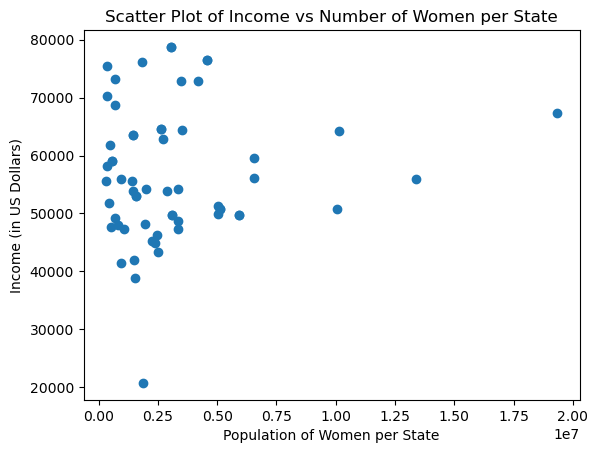

In [36]:
import matplotlib.pyplot as plt

plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()

### 3.2 Histograms of Race Data
I also created histograms for the percentage of various racial groups in each state. To do this, I cleaned the race columns by removing percentage signs and handling missing values.

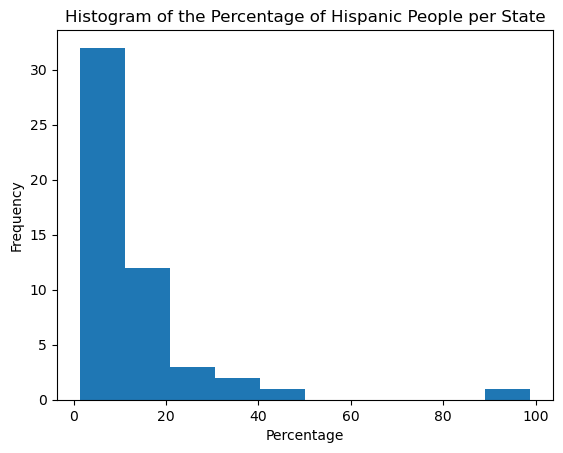

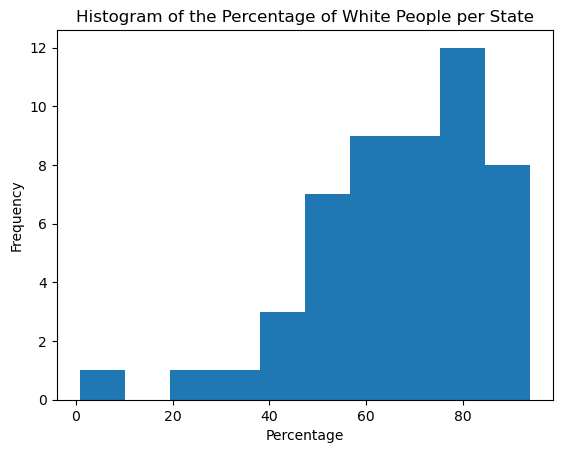

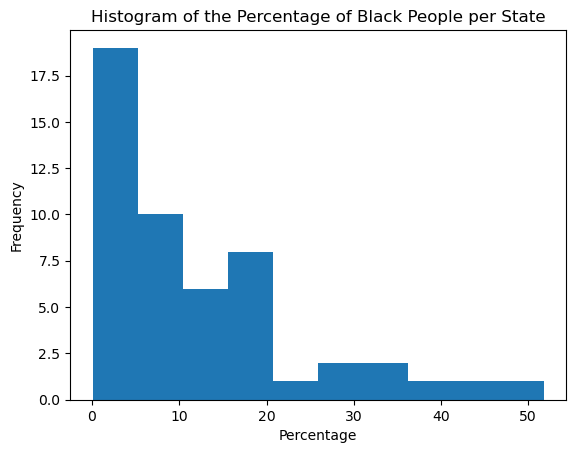

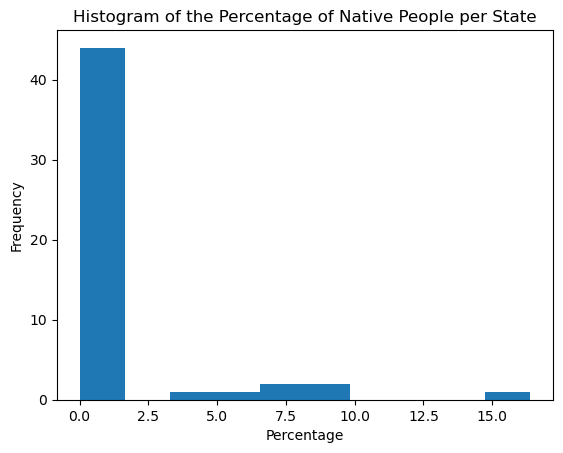

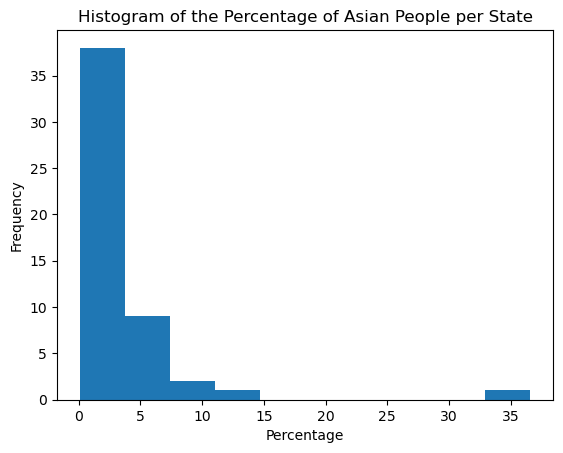

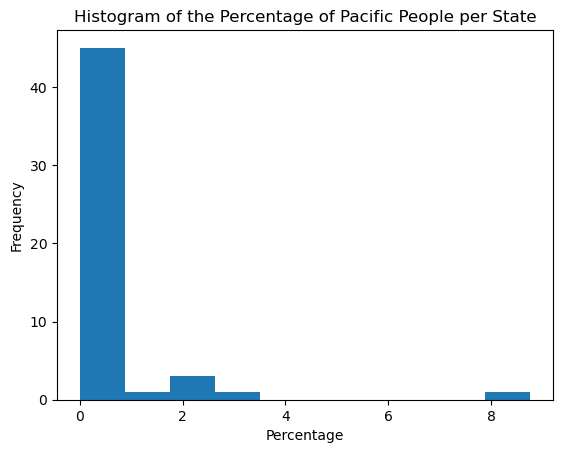

<Figure size 640x480 with 0 Axes>

In [39]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0,len(us_census)):    
        string = str(us_census[race].iat[index])
        replace = string.replace('%', '')
        if (replace == "nan"):
            replace = ""
        us_census[race].iat[index] = replace
    us_census[race] = pd.to_numeric(us_census[race])
    
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

census = us_census.drop_duplicates(subset = us_census.columns[1:])
census

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

## Step 4: More Visualizations
### Goal 1: Visualize the Distribution of Hispanic Population Percentage
**Objective:** Create a visualization to show the distribution of the Hispanic population percentage across states.

**Visualization:** A histogram will be used to display the distribution of Hispanic population percentages. Each bar in the histogram represents a range of Hispanic population percentages, and the height of each bar represents the frequency (number of states) in that range.

**Implementation:**

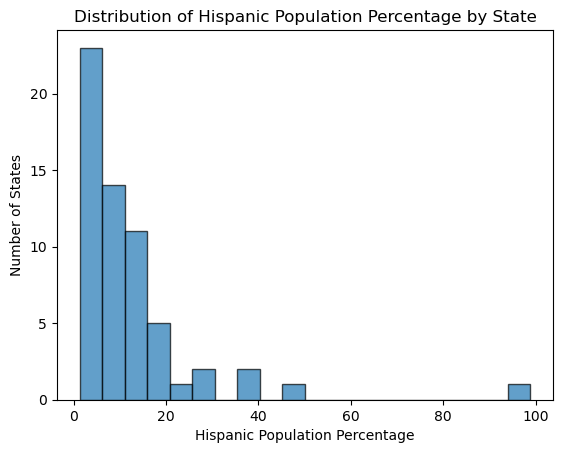

In [41]:
# Create a histogram for the Hispanic population percentage
plt.hist(us_census['Hispanic'], bins=20, edgecolor='k', alpha=0.7)
plt.title("Distribution of Hispanic Population Percentage by State")
plt.xlabel("Hispanic Population Percentage")
plt.ylabel("Number of States")
plt.show()


This histogram will provide insight into the distribution of Hispanic population percentages across states, helping to identify patterns or variations.

### Goal 2: Visualize the Distribution of Black Population Percentage
**Objective:** Create a visualization to show the distribution of the Black population percentage across states.

**Visualization:** Similar to the first goal, we will use a histogram to display the distribution of Black population percentages. Each bar in the histogram represents a range of Black population percentages, and the height of each bar represents the frequency (number of states) in that range.

**Implementation:**

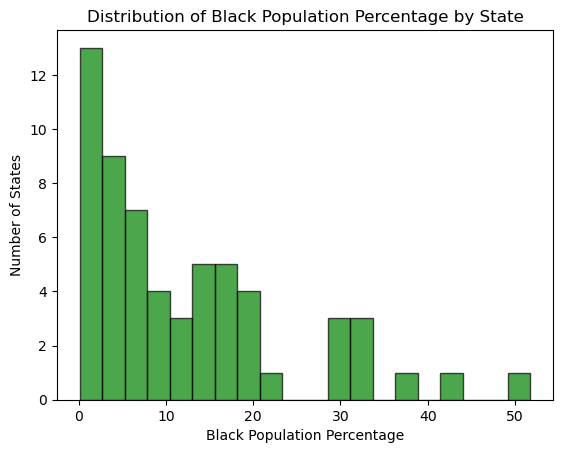

In [42]:
# Create a histogram for the Black population percentage
plt.hist(us_census['Black'], bins=20, edgecolor='k', alpha=0.7, color='green')
plt.title("Distribution of Black Population Percentage by State")
plt.xlabel("Black Population Percentage")
plt.ylabel("Number of States")
plt.show()

This histogram will provide insight into the distribution of Black population percentages across states, helping to identify patterns or variations.

By setting specific goals and creating these visualizations, we can gain a better understanding of the distribution of Hispanic and Black populations across different states, which may lead to valuable insights and comparisons.

##Conclusion

In this data analysis project, we successfully cleaned and analyzed US Census data to derive meaningful insights. The process involved several key steps:

1. **Data Inspection:** We began by inspecting the raw data to understand its structure and content. The data was originally scattered across multiple CSV files, and we merged them into a single DataFrame for analysis.
2. **Data Cleaning:** Data cleaning was a crucial step in this project. We addressed various issues in the dataset:
    - Cleaned the 'Income' column by removing dollar signs and commas and converting it to a numeric data type.
    - Split the 'GenderPop' column into 'Men' and 'Women' columns, removing 'M' and 'F' characters, and converting them to numeric data types.
    - Handled missing values in the 'Women' column by estimating values based on total population and men population.
    - Removed duplicate rows to ensure data integrity.
3. **Visualizations:** We created informative visualizations to gain insights from the cleaned data, including:
    - A scatterplot showing the relationship between income and the proportion of women in each state.
    - Histograms to visualize the distribution of population percentages for different racial groups across states, such as Hispanic and Black populations.
### Insights Gained:
1. The scatterplot of income vs. the proportion of women revealed that there is no strong linear correlation between income and the proportion of women in states. However, it provided a starting point for further investigation into gender-related economic disparities.
2. The histograms of population percentages for various racial groups (e.g., Hispanic and Black populations) allowed us to understand the distribution patterns. For instance, we observed variations in the distribution of Hispanic and Black populations across states. Some states had a higher percentage of these populations compared to others.

In summary, this project demonstrated the power of data cleaning and visualization techniques using Python and pandas. We successfully transformed messy census data into a clean, usable format and gained valuable insights into income, gender proportions, and racial demographics across states. These insights can serve as a foundation for more in-depth analyses and decision-making processes.